We are going to be using The History of Baseball dataset for our analysis. One of the suggestions for analysis is, "Is there a most error-prone position?" We're going to try and answer that question. While there may be other kernels out there that have already tackled this problem, I have not looked for them. I am still learning, and I want this analysis to be entirely my own.

In [52]:
# importing all the required libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from subprocess import check_output

In [53]:
#Reading the CSV file and storing it in the dataset fielding
fielding = pd.read_csv('D:/Users/vin/Desktop/FinalProject-Python/the-history-of-baseball/fielding.csv')

In [54]:
fielding = fielding[fielding['pos']!='DH']

#After observing the file properly, we can notice that we do not need DH as the DH only bats

In [55]:
errors = fielding.groupby(by='pos')['e'].sum() #Let us compare the errors for each position

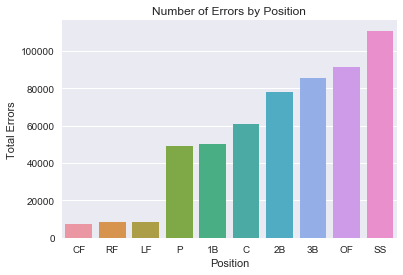

In [56]:
# Let's view the results
sb.barplot(x=errors.sort_values().index, y=errors.sort_values())
plt.title('Number of Errors by Position')
plt.xlabel('Position')
plt.ylabel('Total Errors')

In [57]:
errors['OF'] = errors['CF'] + errors['RF'] + errors['LF'] + errors['OF']
#We can see that the SS position has the most erros, but that does not mean that SS is more error prone.
# As it is a very important position, it might be involved in more plays. CF, RF and LF have far fewer erros than the
# other positions. Before 1954, they were all recorded as OF. Lets now add all the outfield positions and see what we get.

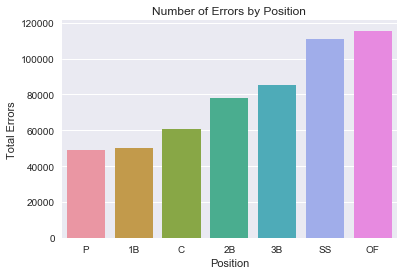

In [62]:
# Let's view the updated results.
sns.barplot(x=errors.sort_values().index, y=errors.sort_values())
plt.title('Number of Errors by Position')
plt.xlabel('Position')
plt.ylabel('Total Errors')

In [21]:
errors_po = fielding.groupby(by='pos')[['e', 'po']].sum()

# So now it looks like outfielders may have made more errors than shortstops. But perhaps there is more to it than total errors. Certain positions may handle the ball more, so we'd expect more errors. To account for this, we'll now compare errors per putout for each position. First we'll group the dataframe by position, then select the error and putouts columns, then we'll sum them.


In [64]:
# Let's check the head to make sure we got what we want.
errors_po.head()

,e,po,e/po
pos,,,
1B,50112.0,3905147.0,0.012832
2B,78176.0,973582.0,0.080297
3B,85280.0,406128.0,0.209983
C,60685.0,2325955.0,0.026090
OF,115559.0,3852289.0,0.029997


In [23]:
# Since we already know about the outfield problem, let's go ahead and sum the results of the individual outfield positions and add them to the OF line.
errors_po.loc['OF']['e'] = errors_po.loc['OF']['e'] + errors_po.loc['LF']['e'] + errors_po.loc['CF']['e'] + errors_po.loc['RF']['e']
errors_po.loc['OF']['po'] = errors_po.loc['OF']['po'] + errors_po.loc['LF']['po'] + errors_po.loc['CF']['po'] + errors_po.loc['RF']['po']

In [24]:
#Now let's remove the individual outfield positions.
errors_po.drop(['CF', 'RF', 'LF'], axis=0, inplace=True)

In [25]:
# We have errors and putouts, but we need to create the column error/putout. We can define a function that takes in a dataframe and returns the errors column divided by the putouts column.
def e_per_po(df):
    return df['e'] / df['po']

In [26]:
# Now we apply our new function to the dataframe.
errors_po['e/po'] = errors_po.apply(e_per_po, axis=1)

In [27]:
# Check the head to see if calculated correctly
errors_po.head()

,e,po,e/po
pos,,,
1B,50112.0,3905147.0,0.012832
2B,78176.0,973582.0,0.080297
3B,85280.0,406128.0,0.209983
C,60685.0,2325955.0,0.026090
OF,115559.0,3852289.0,0.029997
